# **Names**
1. 169084 - Ali Omar
2. 168945 - Denzel Ngare
3. 169819 - Sumeiya Abass
4. 169977 - Suweyba Ahmed
5. 150496 - Emran Abdi Ahmed
6. 150350 - Alio Ilyas Abdi

# **QUESTION 1: DOWNLOADING DIAMONDS DATASET**

In [31]:
!pip install kagglehub
import kagglehub
path = kagglehub.dataset_download("shivam2503/diamonds")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\hp\.cache\kagglehub\datasets\shivam2503\diamonds\versions\1


In [30]:
import pandas as pd
import os

csv_path = os.path.join(path, "diamonds.csv")

diamonds = pd.read_csv(csv_path)

diamonds.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# **QUESTION 2: CLEANING THE DATASET AND DOING THE EXPLARATORY DATA ANALYSIS**

In [3]:
diamonds.isnull().sum()
diamonds.info
diamonds.describe

<bound method NDFrame.describe of        Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

     

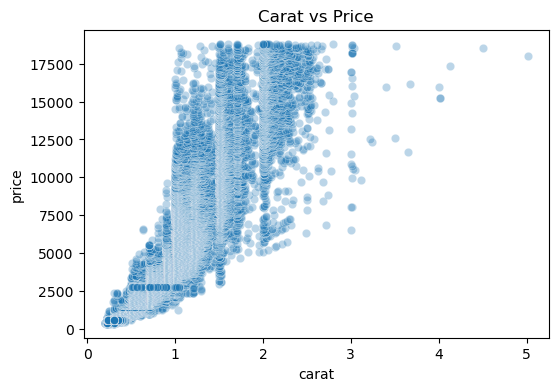

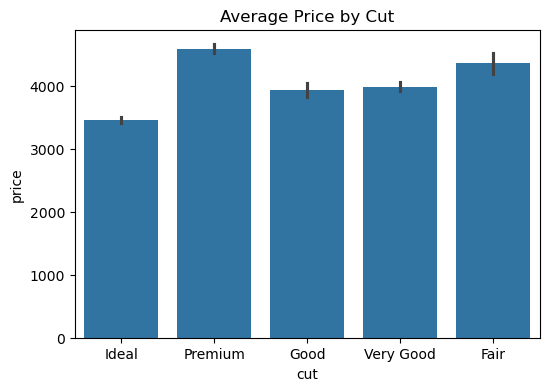

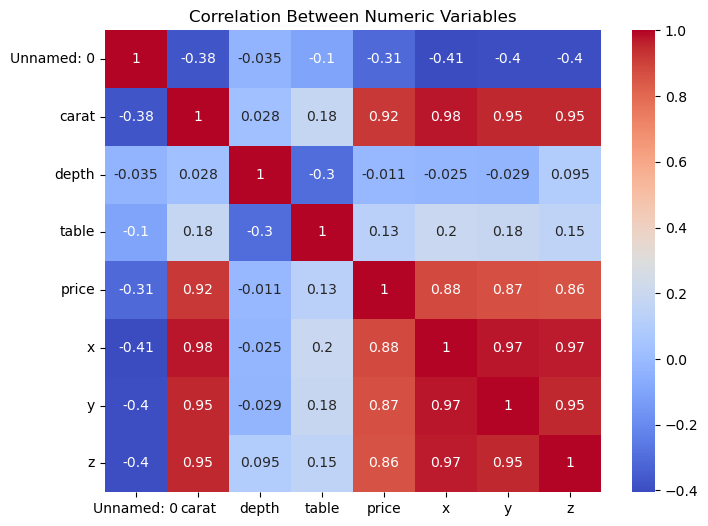

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.scatterplot(x="carat", y="price", data=diamonds, alpha=0.3)
plt.title("Carat vs Price")

plt.figure(figsize=(6,4))
sns.barplot(x="cut", y="price", data=diamonds, estimator="mean")
plt.title("Average Price by Cut")

plt.figure(figsize=(8,6))
sns.heatmap(diamonds.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numeric Variables")
plt.show()

In [6]:
diamonds_model = diamonds.sample(12500, random_state=42)
diamonds_model.shape

(12500, 11)

# **QUESTION 3: lINEAR REGRESSION ALGORITHM**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

diamonds_encoded = pd.get_dummies(diamonds_model, drop_first=True)

X = diamonds_encoded.drop('price', axis=1)
y = diamonds_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred = lin_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Results")
print("-------------------------------")
print(f"RMSE: {rmse: .2f}")
print(f"R^2 Score: {r2: .4f}")

Linear Regression Model Results
-------------------------------
RMSE:  1100.41
R^2 Score:  0.9237


# **QUESTION 4: APPLYING PRINCIPLE COMPONENT ANALYSIS (PCA)**

In [16]:
from sklearn.decomposition import PCA

numeric_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']

X_continuous = diamonds_model[numeric_cols]
y = diamonds_model['price']

scale = StandardScaler()
X_scaled = scaler.fit_transform(X_continuous)

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.66727294 0.21219253]


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

pca_reg = LinearRegression()
pca_reg.fit(X_train_pca, y_train)

y_pred_pca = pca_reg.predict(X_test_pca)

mse_pca = mean_squared_error(y_test, y_pred_pca)
rmse_pca = np.sqrt(mse_pca)
r2_pca = r2_score(y_test, y_pred_pca)

print("PCA + Linear Regression Results")
print("-------------------------------")
print(f"RMSE: {rmse_pca: .2f}")
print(f"R^2 Score: {r2_pca: .4f}")

PCA + Linear Regression Results
-------------------------------
RMSE:  1756.03
R^2 Score:  0.8056


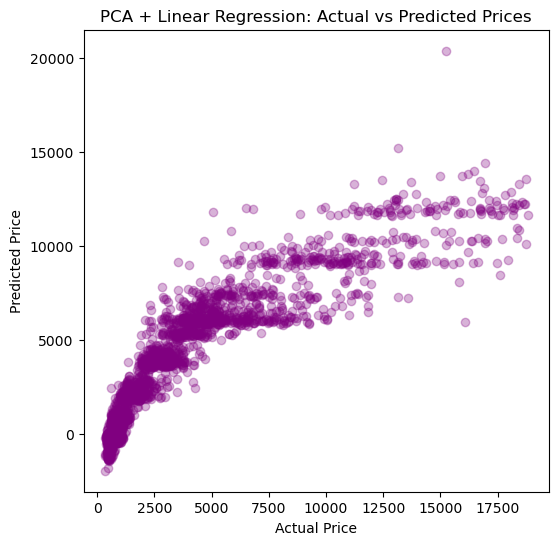

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_pca, alpha=0.3, color='purple')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("PCA + Linear Regression: Actual vs Predicted Prices")
plt.show() 

# **QUESTION 5: LASSO AND RIDGE REGULISATIONS**

In [25]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lasso_reg = Lasso(alpha=0.1, max_iter=10000, random_state=42)
lasso_reg.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_reg.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Results")
print("------------------------")
print(f"RMSE: {rmse_lasso: .2f}")
print(f"R^2 Score: {r2_lasso: .4}")

Lasso Regression Results
------------------------
RMSE:  1100.42
R^2 Score:  0.9237


In [26]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0, random_state=42)
ridge_reg.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_reg.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Results")
print("------------------------")
print(f"RMSE: {rmse_ridge: .2f}")
print(f"R^2 Score: {r2_ridge: .4f}")



Ridge Regression Results
------------------------
RMSE:  1100.45
R^2 Score:  0.9236


In [28]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "PCA + Linear Regression", "Lasso Regression", "Ridge Regression"],
    "RMSE": [rmse, rmse_pca, rmse_lasso, rmse_ridge],
    "R^2 Score": [r2, r2_pca, r2_lasso, r2_ridge]
})

results

,Model,RMSE,R^2 Score
0,Linear Regression,1100.409446,0.923653
1,PCA + Linear Regression,1756.027478,0.805577
2,Lasso Regression,1100.417554,0.923652
3,Ridge Regression,1100.450125,0.923647


# **QUESTION 6: COMPARISON OF THE 4 MODELS CREATED**

- The **Linear Regression** and **Lasso** models performed best as they had the highest R² Score and lowest RMSE indicating excellent performance. 
**Lasso's Regulization** didn't imporve aacuracy much because the dataset is already well-structured and features are properly scaled. 
- **PCA** performed the worst due to reduced input space to only 2 components that led to losing valuable information.
this led to a noticeable drop in accuracy.
- **Ridge Regulization** didn't improve results since it adds a small penalty on large coefficients, but since multicollinearity wasn't severe, it made little difference.
- Therefore, the Linear Regression model is the recommended choice for this dataset.

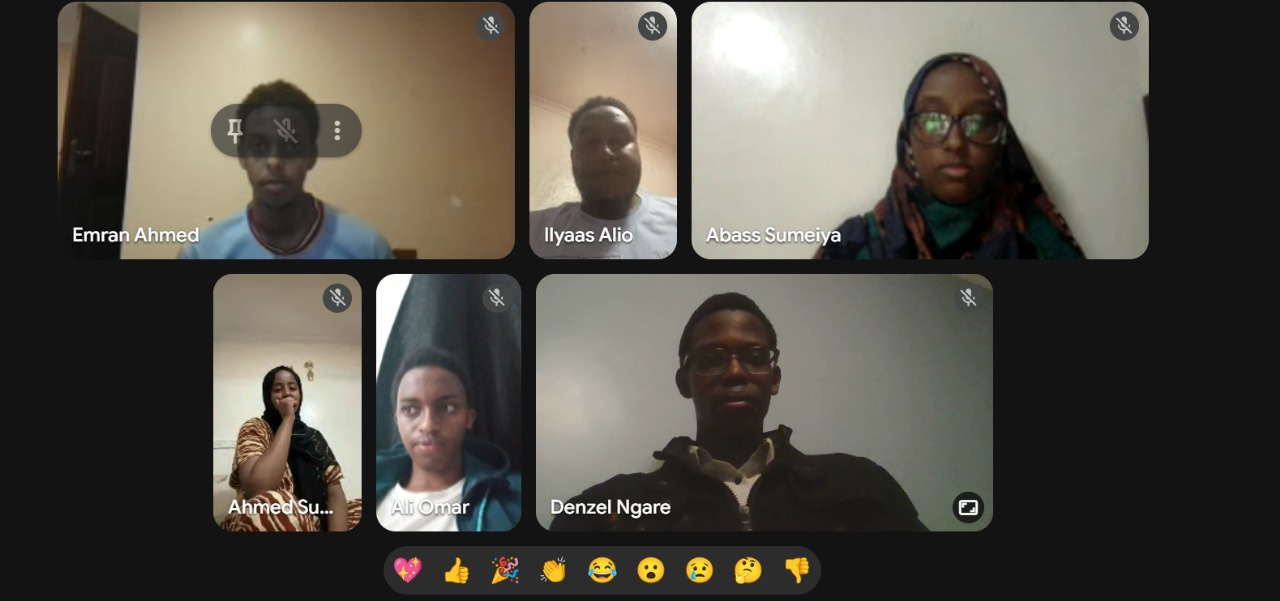

In [2]:
from IPython.display import Image
Image(r"C:\Users\hp\Desktop\team_photo.jpeg")
